# Q. 1
Create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#create and examine bottle dataframe
bottle_df = pd.read_csv("bottle.csv", low_memory=False)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#create and examine cast dataframe
cast_df = pd.read_csv("cast.csv", low_memory=False)
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


# For bottle data

In [4]:
#find columns with null values
bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [24]:
#dropping columns with multiple NaN values
bottle_df.drop((['Sta_ID','Depth_ID']), axis=1, inplace=True)
bottle_df.dropna(axis=0, subset=['T_degC'], inplace = True)
bottle_drop= bottle_df.drop(['TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment', 'R_O2Sat','O2ml_L','R_O2','O2Sat', 'Oxy_µmol/Kg', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'R_SIO3', 'DIC1', 'DIC2' ], axis= 1)
bottle_drop.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,BtlNum,RecInd,T_prec,T_qual,...,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,0,10.50,33.440,25.649,NaN,3,1.0,NaN,...,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,8,10.46,33.440,25.656,NaN,3,2.0,NaN,...,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,10,10.46,33.437,25.654,NaN,7,2.0,NaN,...,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,19,10.45,33.420,25.643,NaN,3,2.0,NaN,...,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,20,10.45,33.421,25.643,NaN,7,2.0,NaN,...,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20


In [25]:
# Using interpolate to replace remaning NaNs
bottle_drop = bottle_drop.interpolate()

In [26]:
#standardadize the data
bottle_df_std=bottle_drop.select_dtypes(include=[np.number])
bottle_df_std

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,BtlNum,RecInd,T_prec,T_qual,...,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,0,10.500,33.4400,25.64900,NaN,3,1.0,NaN,...,9.0,NaN,0.0,10.50,10.50,33.440,25.640,233.0,0.000,0
1,1,2,8,10.460,33.4400,25.65600,NaN,3,2.0,NaN,...,9.0,NaN,8.0,10.46,10.46,33.440,25.650,232.5,0.010,8
2,1,3,10,10.460,33.4370,25.65400,NaN,7,2.0,NaN,...,9.0,NaN,10.0,10.46,10.46,33.437,25.650,232.8,0.020,10
3,1,4,19,10.450,33.4200,25.64300,NaN,3,2.0,NaN,...,9.0,NaN,19.0,10.45,10.45,33.420,25.640,234.1,0.040,19
4,1,5,20,10.450,33.4210,25.64300,NaN,7,2.0,NaN,...,9.0,NaN,20.0,10.45,10.45,33.421,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,23.87055,2.5,7,2.0,6.0,...,9.0,0.005,0.0,18.74,18.74,33.408,23.871,402.4,0.000,0
864859,34404,864860,2,18.744,33.4083,23.87072,4.0,3,2.0,6.0,...,9.0,0.005,2.0,18.74,18.74,33.408,23.871,402.5,0.008,2
864860,34404,864861,5,18.692,33.4150,23.88911,3.0,3,2.0,6.0,...,9.0,0.005,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5
864861,34404,864862,10,18.161,33.4062,24.01426,2.0,3,2.0,6.0,...,9.0,0.005,10.0,18.16,18.16,33.406,24.014,389.1,0.040,10


In [27]:
scaler = StandardScaler()
bottle_df_scaled = pd.DataFrame(scaler.fit_transform(bottle_df_std))

# For cast data

In [17]:
cast_df.isnull().sum()

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64

In [16]:
#dropping columns with multiple NaN values
cast_drop= cast_df.drop(['Wet_T','Cloud_Typ','Cloud_Amt','Visibility','Distance','Secchi','ForelU','Order_Occ','Cruz_Leg','Data_Or', 'Civil_T', 'Wave_Dir', 'Wave_Ht'], axis= 1)


In [18]:
# Using interpolate to replace remaning NaNs
cast_drop = cast_drop.interpolate()

In [20]:
#standardadize the data
cast_df_std=cast_drop.select_dtypes(include=[np.number])

In [22]:
scaler = StandardScaler()
cast_df_scaled = pd.DataFrame(scaler.fit_transform(cast_df_std))
cast_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.732000,-1.267657,-1.267680,-1.771799,-1.251565,-1.266164,-0.852308,-1.312992,-1.006019,1.926136,...,-1.259534,NaN,NaN,NaN,NaN,-0.432027,1.014585,NaN,NaN,0.614606
1,-1.731900,-1.267657,-1.267681,-1.861886,-1.251565,-1.266164,-0.852308,-1.312992,-1.006019,1.857753,...,-1.258715,NaN,NaN,NaN,NaN,-1.177945,-0.911427,NaN,NaN,2.438543
2,-1.731799,-1.267657,-1.267681,-1.906928,-1.251565,-1.266164,-0.852308,-1.312847,-0.996095,1.828120,...,-1.257896,NaN,NaN,NaN,NaN,-0.432027,-0.911427,NaN,NaN,4.262481
3,-1.731698,-1.267657,-1.267682,-1.951969,-1.251565,-1.266164,-0.852308,-1.312847,-0.996095,1.789370,...,-1.257077,NaN,NaN,NaN,NaN,-0.964826,-0.466963,NaN,NaN,0.614606
4,-1.731598,-1.267657,-1.267682,-1.951929,-1.251565,-1.266164,-0.852308,-1.312847,-0.996095,1.762017,...,-1.256258,NaN,NaN,NaN,NaN,-0.005787,0.273811,NaN,NaN,5.174450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,1.731598,2.129601,2.129607,0.000252,1.495995,2.126860,1.552458,1.529192,1.504904,-0.258722,...,-1.122743,-0.495615,-0.597581,0.0,2.421850,0.740131,0.718275,0.147605,0.296137,0.310616
34400,1.731698,2.129601,2.129607,0.000297,1.495995,2.126860,1.552458,1.529192,1.504904,-0.349866,...,-1.115372,-0.456525,-0.597581,0.0,3.197407,0.953251,0.421966,0.390058,0.629823,0.006627
34401,1.731799,2.129601,2.129607,0.000342,1.495995,2.126860,1.552458,1.529192,1.504904,-0.442536,...,-1.108000,-0.502130,-0.597581,0.0,3.972964,0.846691,0.718275,0.274604,1.000585,-0.297363
34402,1.731900,2.129601,2.129607,0.000387,1.495995,2.126860,1.552458,1.529192,1.504904,-0.531981,...,-1.086703,-0.528190,-0.597581,0.0,1.646293,0.953251,0.718275,0.009060,1.185966,-0.297363


# Q. 2
Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.  

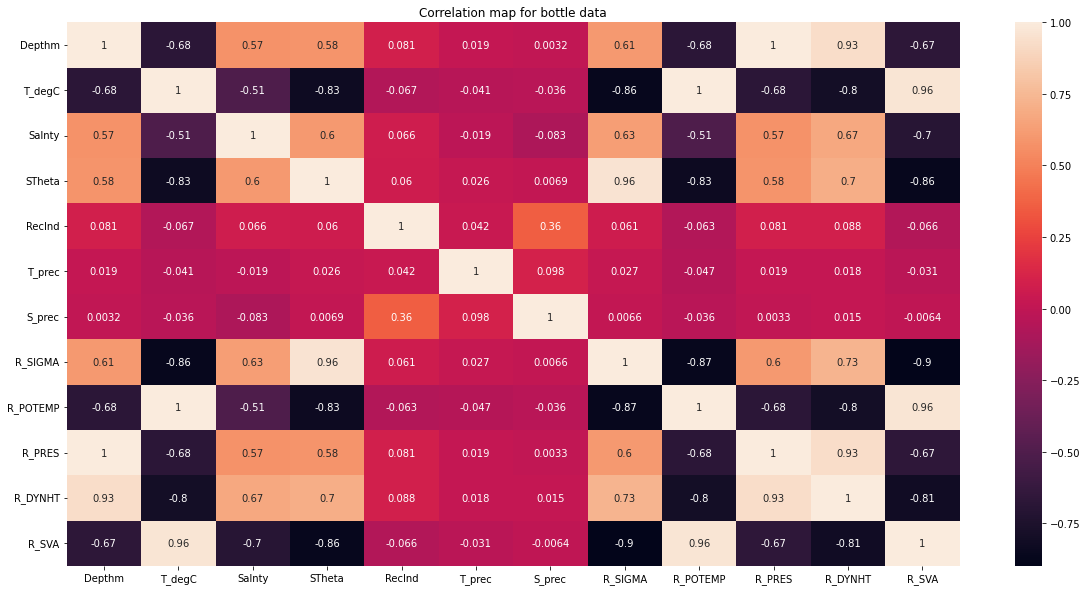

In [30]:
corr_df= bottle_df[['Depthm','T_degC','Salnty','STheta','RecInd','T_prec','S_prec', 'R_SIGMA', 'R_POTEMP', 'R_PRES', 'R_DYNHT', 'R_SVA']]
bottle_corr= corr_df.corr()
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(bottle_corr, annot=True)
plt.title("Correlation map for bottle data")
plt.show()

From the above diagram we can make the following observations:
- Depth and pressure have direct positive correlation
- Water temperature and salinity have moderately negative correlation
- Water temperature and depth have signifcantly negative correlation
- Water temperature and density(Stheta) have signifcantly negative correlation

# Q. 3
Perform linear regression on the dataset to see if you can predict water temperature based on salinity.  

In [34]:
# creating sample
X = np.array(bottle_drop['Salnty']).reshape(-1,1)
y = np.array(bottle_drop['T_degC']).reshape(-1,1)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=28)

# creating the model
regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

y_pred = regression_df.predict(X_test)
y_pred



array([[11.05587767],
       [ 6.87223431],
       [12.05829519],
       ...,
       [ 7.37758529],
       [12.26540625],
       [11.3748287 ]])

In [36]:
accuracy= regression_df.score(X_test, y_test)
accuracy

0.20946541726492007

The accuracy is too low to be highly dependable

# Q. 4
Find your mean squared error and R2 values. Be sure to indicate what these tell you.

In [37]:
# Calculating Mean Squared error
mean_squared_error(y_test, y_pred)

14.17243597619854

The Mean Squared Error (MSE) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.

In [38]:
# caculating R2 values
r2_score(y_test, y_pred)

0.20946541726492007

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

# Q. 5
Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.

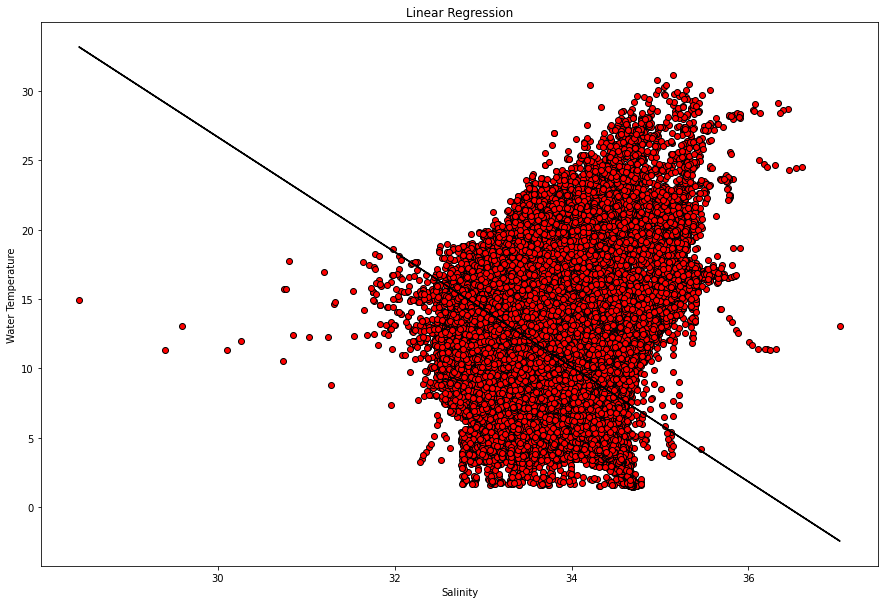

In [39]:
plt.subplots(1,1,figsize=(15,10))
plt.scatter(X_test, y_test, color = 'red', edgecolor='black')
plt.plot(X_test, y_pred, color='black')
plt.title('Linear Regression')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
plt.show()

# Q. 6
Do some research on polynomial regression. Describe what it is any how it works in markdown.

Polynomial features are a type of feature engineering where there is the creation of new input features based on the existing features. This can help some machine learning algorithms make better predictions and is common for regression predictive modeling tasks. Polynomial regression is a form of linear regression known as a special case of Multiple linear regression which estimates the relationship as an nth degree polynomial. It can fit a wide range of curvature, and a broad range of functions can fit under it.

# Q. 7
Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply her

In [42]:
X = np.array(bottle_drop['Salnty']).reshape(-1,1)
y = np.array(bottle_drop['T_degC']).reshape(-1,1)

poly = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
y_poly_pred = lin2.predict(X_poly)
y_poly_pred

array([[12.70934175],
       [12.70934175],
       [12.72781364],
       ...,
       [12.86303658],
       [12.91699011],
       [13.02828111]])

In [43]:
# Calculating Mean Squared error
mean_squared_error(y, y_poly_pred)

12.897330927438588

In [44]:
# caculating R2 values
r2_score(y, y_poly_pred)

0.28388051804845127

# Q. 8
Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved

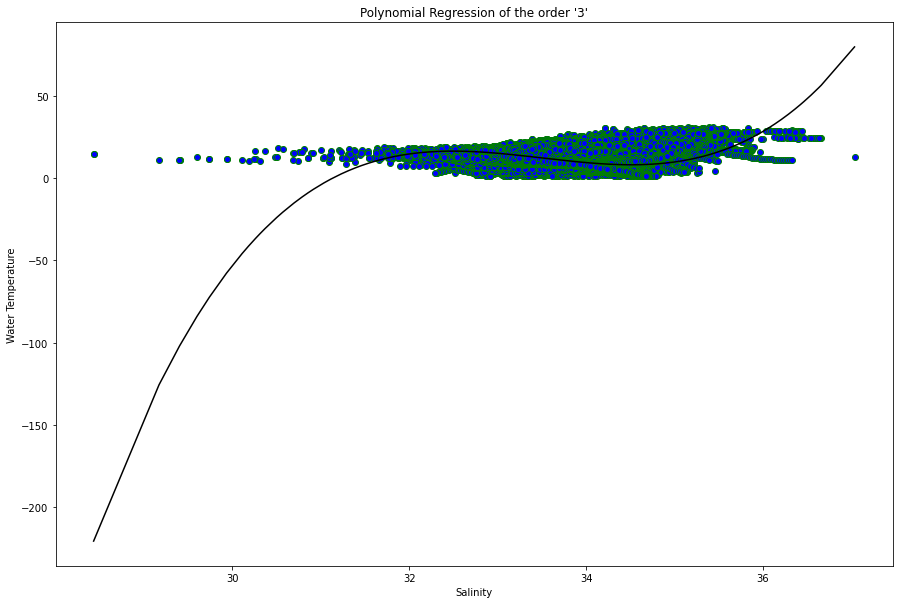

In [45]:
# Visualising the Polynomial Regression results
plt.subplots(1,1,figsize=(15,10))
plt.scatter(X, y, color = 'blue', edgecolor='green')
    
orders = np.argsort(X.ravel())    
    
plt.plot(X[orders], y_poly_pred[orders], color = 'black')
plt.title("Polynomial Regression of the order '3'")
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
 
plt.show()

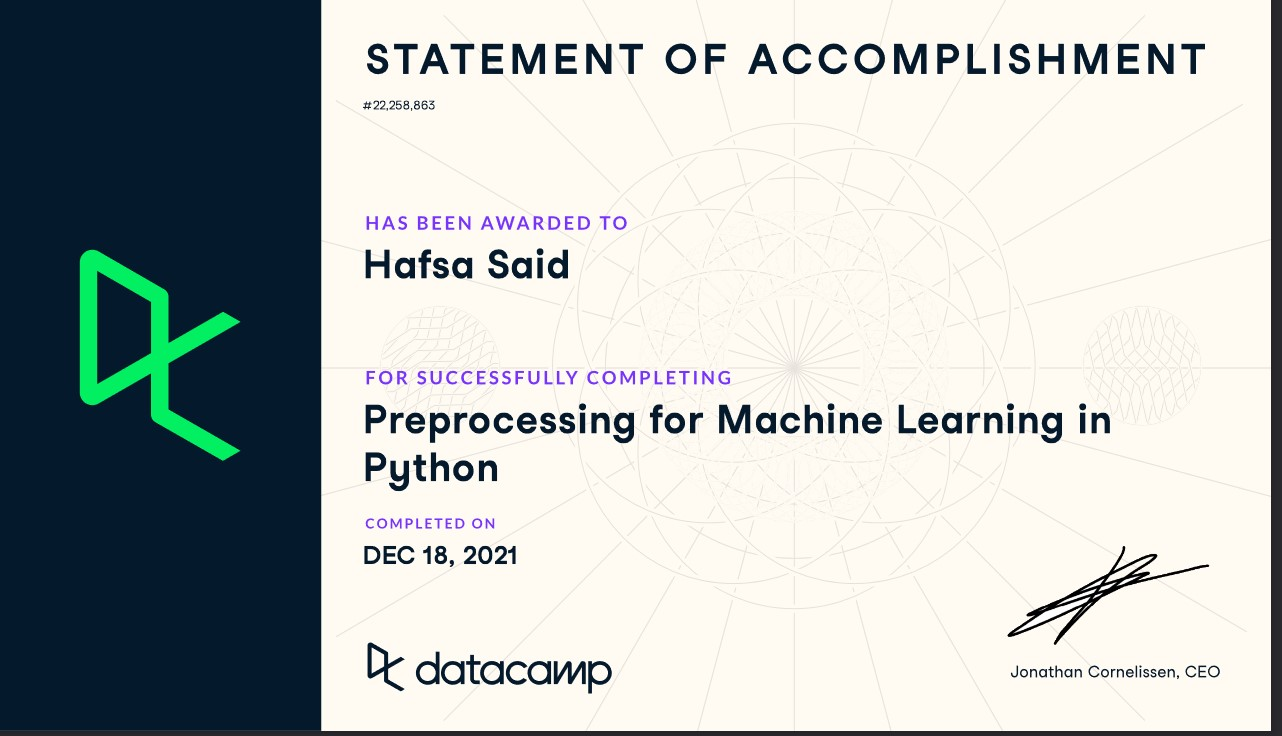

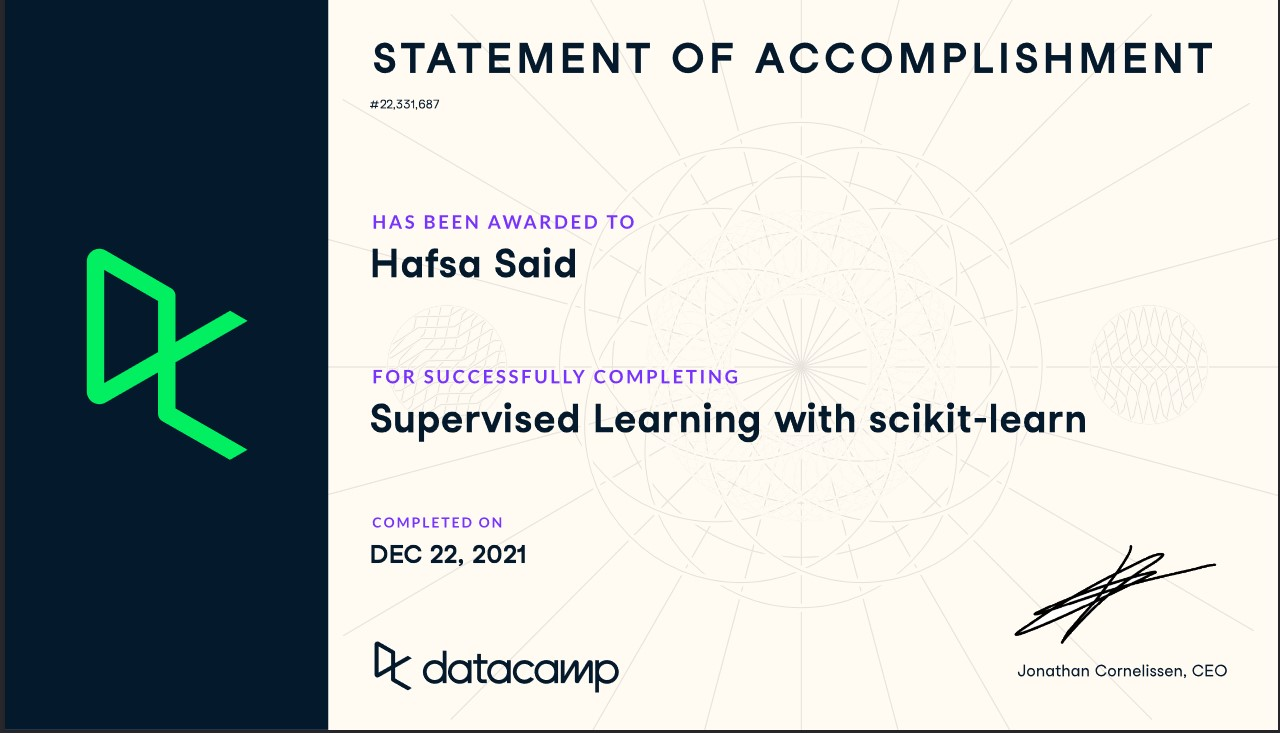